In [7]:
#!/usr/bin/python
# vim: set fileencoding=UTF-8 :
#!pip install pymupdf
#!pip install wordcloud
! pip install fitz

'pip' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [2]:
import fitz
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
import matplotlib.colors
from encodings import utf_8

ModuleNotFoundError: No module named 'fitz'

In [ ]:
def pdfs ():
  diretorio = 'Arquivo/'
  compilado = ""
  for arquivo in os.listdir(diretorio):
      f = os.path.join(diretorio, arquivo)
      if os.path.isfile(f):
        with fitz.open(f) as pdf:
                  texto = ""
                  for pagina in pdf:
                      texto += pagina.get_text() 
      compilado += texto
  return compilado                     

In [ ]:
def nuvem(compilado):
    palavras_retiradas = open('palavras a serem excluidas.txt', 'r', encoding='utf_8')
    palavras_retiradas = palavras_retiradas.read().split(',')
    cores_logo = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#90E675", "#46D519", "#35A013" ,"#A57AEC","#874DE6","#6921E0","#C0C0C0","#969696"])
    stopwords = set(STOPWORDS)
    stopwords.update(palavras_retiradas)

    nuvem = WordCloud(stopwords=stopwords,
                        background_color="white",
                        max_words= 100,
                        colormap= cores_logo,
                        width=1600, height=800).generate(compilado)
    fig, ax = plt.subplots(figsize=(15,13))
    ax.imshow(nuvem, interpolation='bilinear')
    ax.set_axis_off()
    plt.imshow(nuvem);
    nuvem.to_file("nuvem.png")                   

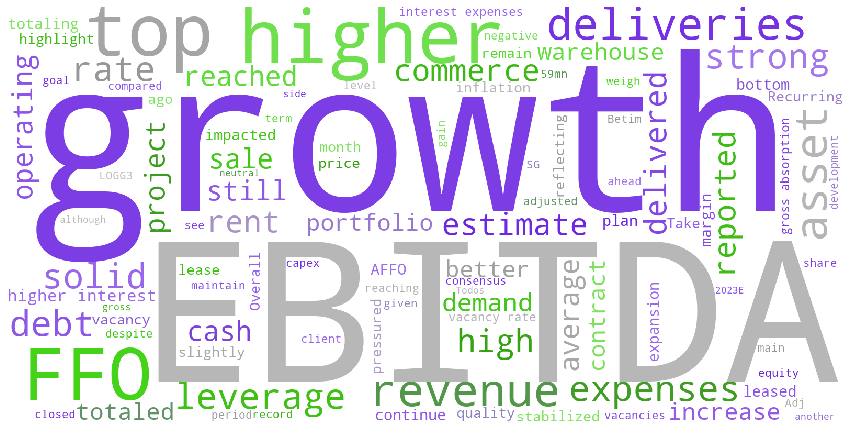

In [ ]:
compilado = pdfs()
nuvem(compilado)

